In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec


#📌 Extracão

In [54]:
dados = pd.read_json('TelecomX_Data.json')
dados_nomes_colunas = list(dados.columns)


In [55]:
dados_Customer = pd.json_normalize(dados['customer'])
dados_Account = pd.json_normalize(dados['account'])
dados_Phone = pd.json_normalize(dados['phone'])
dados_Internet = pd.json_normalize(dados['internet'])
Churn = dados['Churn']

#🔧 Transformação

In [56]:
dados_Account['Charges.Total'] = dados_Account['Charges.Monthly'].astype('float64')
dados_Account['Charges.Total'] = dados_Account['Charges.Total'].replace(' ', "Desconhecido")
Churn = Churn.replace('', "Desconhecido")

In [57]:
dados_Customer['Churn'] = Churn
dados_Customer['Charges.Monthly'] = dados_Account['Charges.Monthly']
dados_Phone['Churn'] = Churn
dados_Account['Churn'] = Churn


In [58]:
dados_tenure = dados_Customer.groupby('tenure')['Churn'].value_counts()
dados_tenure = pd.DataFrame(dados_tenure).reset_index(drop=False)


#📊 Carga e análise


x = list(range(len(tenure_Count)))
x2 = [pos + 0.20 for pos in x]
x3 = [pos + 0.40 for pos in x]
x4 = [pos + 0.60 for pos in x]

xticks = [pos + 0.30 for pos in x]

In [59]:
eixoxcolors = ['lightgreen', 'lightcoral']
Cinza1 = ['#ebebeb']

In [60]:
# evasão por tempo de contrato
def tempo_contrato():
    # Criar uma nova coluna agrupando os clientes por tempo de contrato em anos
    dados_tenure['Ano'] = (dados_tenure['tenure'] // 12) + 1  # Agrupar por anos

# Filtrar dados removendo valores desconhecidos e excluindo "Ano 7"
    dados_tenurepf = dados_tenure[(dados_tenure['Churn'] != 'Desconhecido') & (dados_tenure['Ano'] != 7)].pivot_table(
        index='Ano', columns='Churn', values='count', aggfunc='sum'
        )

    dados_tenurepf.rename(columns={'No': 'Clientes', 'Yes': 'Ex-Clientes'}, inplace=True)

# Reformular os dados para o formato longo (necessário para usar o hue)
    dados_tenurepf_reset = dados_tenurepf.reset_index().melt(id_vars="Ano", var_name="Status", value_name="Quantidade")

    # Criar a figura e ajustar espaçamento entre barras
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(data=dados_tenurepf_reset, x="Ano", y="Quantidade", hue="Status", palette=["lightgreen", "lightcoral"])

    # Adicionar valores acima de cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=12, padding=3)

    # Adicionar linhas de tendência corretamente alinhadas com as barras
    x = np.arange(len(dados_tenurepf.index))
    anos = dados_tenurepf.index.astype(str) # Converter anos para string para alinhar com as barras
    sns.lineplot(x=x - 0.2, y=dados_tenurepf["Clientes"].mean(), color="lightgreen", linestyle="--", linewidth=2, marker='o', label="Media de Clientes")
    sns.lineplot(x=x + 0.2, y=dados_tenurepf["Ex-Clientes"].mean(), color="lightcoral", linestyle="--", linewidth=2, marker='o', label="Media de Evasão")

    # Ajustar rótulos e título
    plt.xlabel('')
    plt.title('Permanência e Evasão de Clientes por Tempo de Contrato (Em anos)', fontsize=16)

    # Melhorar a legibilidade dos rótulos do eixo x
    plt.xticks(ticks=range(len(anos)), labels=[f'{i}°Ano de Contrato' for i in anos], rotation=0, fontsize=12)

    # Ajustar legenda e grade
    plt.legend(title='Status do Cliente', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Remover bordas do gráfico e esconder o lado esquerdo
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Ajustar layout e exibir o gráfico
    plt.tight_layout()
    plt.show()

In [61]:
# Receber fatura em casa
def fatura_em_casa():
    fig, ax = plt.subplots(2, 1, figsize=(9,6))
    dados_Customer['Ano'] = (dados_Customer['tenure'] // 12 + 1) 
    # Filtrar dados removendo valores desconhecidos e ex-clientes
    dados_Accountpf = dados_Account[(dados_Account['Churn'] != 'Desconhecido') & (dados_Account['Churn'] != "Yes") & (dados_Customer['Ano'] != 7)]
    dados_Paperless = dados_Accountpf['PaperlessBilling'].value_counts()
    dados_PaperlessLabel = ["Sim", 'Não']

    ax[0].set_title("Cliente prefere receber online a fatura?", fontsize=15)
    ax[0].pie(dados_Paperless, labels=dados_PaperlessLabel, wedgeprops={"edgecolor": "black"}, shadow=True, autopct="%1.1f%%", colors=eixoxcolors)


    # Ex Clientes
    dados_Customer['Ano'] = (dados_Customer['tenure'] // 12 + 1) 
    # Filtrar dados removendo valores desconhecidos e clientes
    dados_Accountpf = dados_Account[(dados_Account['Churn'] != 'Desconhecido') & (dados_Account['Churn'] != "No") & (dados_Customer['Ano'] != 7)]
    dados_Paperless = dados_Accountpf['PaperlessBilling'].value_counts()
    dados_PaperlessLabel = ["Sim", 'Não']

    ax[1].set_title("ex-Cliente prefere receber online a fatura?", fontsize=15)
    ax[1].pie(dados_Paperless, labels=dados_PaperlessLabel, wedgeprops={"edgecolor": "black"}, shadow=True, autopct="%1.1f%%", colors=eixoxcolors)

    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Ricar\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

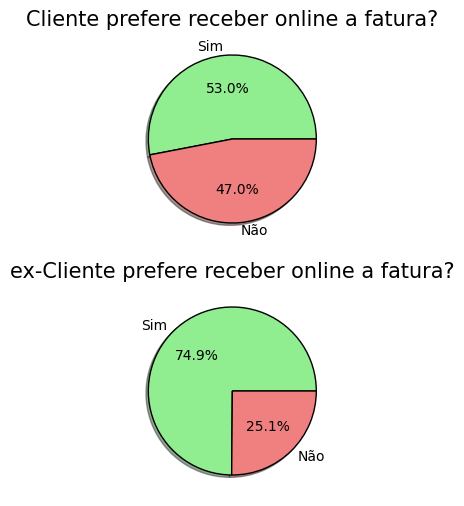

In [62]:
fatura_em_casa()

In [63]:
## media gasta por ano
def Media_anos():
    # Criar uma nova coluna agrupando os clientes por tempo de contrato em anos
    dados_Customer['Ano'] = (dados_Customer['tenure'] // 12 + 1)  # Agrupar por anos

    # Filtrar dados removendo valores desconhecidos e excluindo "Ano 7"
    dados_Customerpf = dados_Customer[(dados_Customer['Churn'] != 'Desconhecido') & (dados_Customer['Ano'] != 7) & (dados_Customer['Churn'] != "Yes")]

    # Total gasto por ano
    anos_total = dados_Customerpf.groupby('Ano')['Charges.Monthly'].sum().reset_index()

    # Média gasta por ano
    anos_media = dados_Customerpf.groupby('Ano')['Charges.Monthly'].mean().reset_index()

    # Criar figura
    fig, ax = plt.subplots(2, 1, figsize=(14, 7))

    # Gráfico de barras (Total gasto por ano)
    ax[0] = sns.barplot(data=anos_total, x="Ano", y="Charges.Monthly", color="lightgreen", edgecolor='black', ax=ax[0], label="Total gasto por ano")

    # Adicionar valores acima de cada barra formatados no padrão brasileiro
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='R$ {:,.2f}', fontsize=12, padding=3)


    # Ajustar título e rótulos
    ax[0].set_xlabel("")
    ax[0].set_title("Valor total gasto de clientes em assinaturas", fontsize=16)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['bottom'].set_visible(False)
    ax[0].get_yaxis().set_visible(False)

    # Melhorar a legibilidade do eixo x
    ax[0].set_xticks(range(len(anos_total["Ano"])))
    ax[0].set_xticklabels([f"{i}°Ano de Contrato" for i in anos_total["Ano"]], rotation=0, fontsize=12)

    # Linha
    x = range(1, len(anos_media) + 1)
    ax[1] = sns.lineplot(x=x, y=anos_media['Charges.Monthly'], color="lightgreen", linestyle="--", linewidth=2, marker='o', ax=ax[1], label="Preço Medio da assinatura")
    
    # Adicionar valores acima de cada marcadores (pontos na linha) formatados no padrão brasileiro
    for i, txt in enumerate(anos_media["Charges.Monthly"]):
        ax[1].annotate(f"R$ {txt:,.2f}", (anos_media["Ano"].iloc[i], anos_media["Charges.Monthly"].iloc[i]), 
                textcoords="offset points", xytext=(0, 20), ha='center', fontsize=12)
    
    # Labels linha
    ax[1].set_title("Gasto medio do cliente", fontsize=16)
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].get_yaxis().set_visible(False)
    ax[1].set_xticks(range(len(anos_media["Ano"])))
    ax[1].set_xticklabels([f"{i}°Ano de Contrato" for i in anos_media["Ano"]], rotation=0, fontsize=12)

    plt.tight_layout()
    plt.show()

    return plt

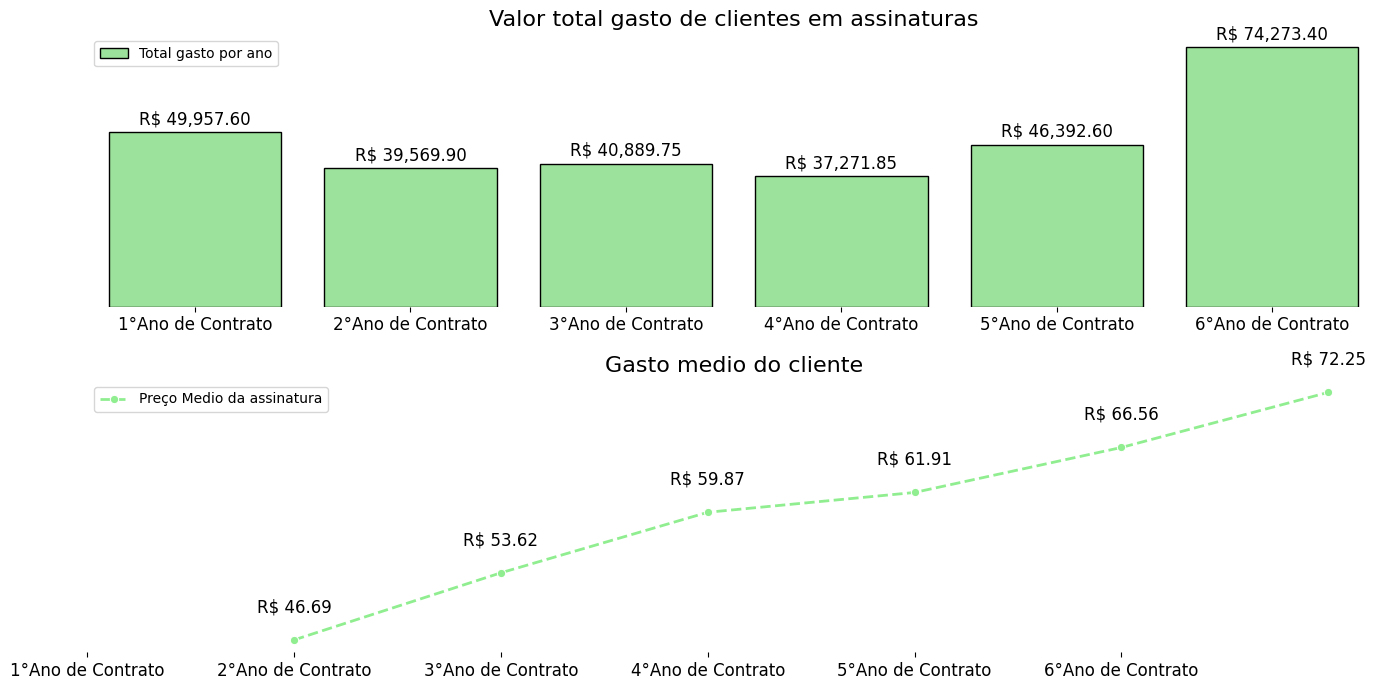

<module 'matplotlib.pyplot' from 'C:\\Users\\Ricar\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

In [64]:
Media_anos()

In [65]:
## media gasta por ano
def Media_anos_ex_clientes():
    # Criar uma nova coluna agrupando os clientes por tempo de contrato em anos
    dados_Customer['Ano'] = (dados_Customer['tenure'] // 12 + 1)  # Agrupar por anos

    # Filtrar dados removendo valores desconhecidos e excluindo "Ano 7"
    dados_Customerpf = dados_Customer[(dados_Customer['Churn'] != 'Desconhecido') & (dados_Customer['Ano'] != 7) & (dados_Customer['Churn'] != "No")]

    # Total gasto por ano
    anos_total = dados_Customerpf.groupby('Ano')['Charges.Monthly'].sum().reset_index()

    # Média gasta por ano
    anos_media = dados_Customerpf.groupby('Ano')['Charges.Monthly'].mean().reset_index()

    # Criar figura
    fig, ax = plt.subplots(2, 1, figsize=(14, 7))

    # Gráfico de barras (Total gasto por ano)
    ax[0] = sns.barplot(data=anos_total, x="Ano", y="Charges.Monthly", color="lightcoral", edgecolor='black', ax=ax[0], label="Total gasto por ano")

    # Adicionar valores acima de cada barra formatados no padrão brasileiro
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='R$ {:,.2f}', fontsize=12, padding=3)


    # Ajustar título e rótulos
    ax[0].set_xlabel("")
    ax[0].set_title("Valor total gasto de ex-clientes em assinaturas", fontsize=16)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['bottom'].set_visible(False)
    ax[0].get_yaxis().set_visible(False)

    # Melhorar a legibilidade do eixo x
    ax[0].set_xticks(range(len(anos_total["Ano"])))
    ax[0].set_xticklabels([f"{i}°Ano de Contrato" for i in anos_total["Ano"]], rotation=0, fontsize=12)

    # Linha
    x = range(1, len(anos_media) + 1)
    ax[1] = sns.lineplot(x=x, y=anos_media['Charges.Monthly'], color="lightcoral", linestyle="--", linewidth=2, marker='o', label="Preço Medio da assinatura")
    
    # Adicionar valores acima de cada marcadores (pontos na linha) formatados no padrão brasileiro
    for i, txt in enumerate(anos_media["Charges.Monthly"]):
        ax[1].annotate(f"R$ {txt:,.2f}", (anos_media["Ano"].iloc[i], anos_media["Charges.Monthly"].iloc[i]), 
                textcoords="offset points", xytext=(0, 20), ha='center', fontsize=12)
    
    # Labels linha
    ax[1].set_title("Gasto medio de ex-cliente", fontsize=16)
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].set_xticklabels([f"{i}°Ano de Contrato" for i in anos_total["Ano"]], rotation=0, fontsize=12)
    ax[1].get_yaxis().set_visible(False)

    plt.tight_layout()
    plt.show()

    return plt

In [93]:
def Genero():
    Hem_Labels = ["Homens", "Mulheres"]
    senior_Labels = ["Não Senhor(a)", "Senhor(a)"]
    pizza_colors = ['cadetblue', 'mediumvioletred']
    senior_colors = ["lightgreen", "slategray"]

    # Dados
    dados_Customerpf = dados_Customer[dados_Customer['Churn'] != "Yes"]
    dados_Customerpf2 = dados_Customer[dados_Customer['Churn'] != "Desconhecido"]
    HeM = dados_Customerpf['gender'].value_counts()
    senior = dados_Customerpf['SeniorCitizen'].value_counts()

    # Layout com GridSpec
    fig = plt.figure(figsize=(18, 10))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.2])
    fig.suptitle("Análise de Gênero e Permanência", fontsize=18)

    # Gráfico de pizza - Gênero
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.pie(HeM, labels=Hem_Labels, autopct="%1.1f%%", shadow=True,
            colors=pizza_colors, wedgeprops={"edgecolor": "black"})
    ax1.set_title("Distribuição por Gênero")

    # Gráfico de pizza - Senior
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.pie(senior, labels=senior_Labels, autopct="%1.1f%%", shadow=True,
            colors=senior_colors, wedgeprops={"edgecolor": "black"})
    ax2.set_title("Senhores(a)")

    # Boxplot ocupando a linha inteira
    ax3 = fig.add_subplot(gs[1, :])
    sns.boxplot(ax=ax3, data=dados_Customerpf2, x='Churn', y='tenure', hue='gender',
                palette={'Male': 'cadetblue', 'Female': 'mediumvioletred'})
    ax3.set_title("Distribuição de idade")
    ax3.set_xticklabels(['Clientes', 'Ex-Clientes'], fontsize=12)
    ax3.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    return plt

In [67]:
dados_Customerpf = pd.concat([dados_Customer, dados_Internet, dados_Phone], axis=1, sort=False)

In [68]:
dados_Phone.drop(columns='Churn', inplace=True)

In [90]:
def adicional():
    dados_Customerpf = pd.concat([dados_Customer, dados_Internet, dados_Phone], axis=1, sort=False)
    dados_Customerpf = dados_Customerpf[dados_Customerpf['Churn'] != 'Yes']
    nao_clientes = dados_Customerpf[dados_Customerpf['Churn'] != 'No']

    # Preparar dados para os gráficos de pizza
    Nao_Tem_adicional = dados_Customerpf[(dados_Customerpf["Partner"] == "Yes") | (dados_Customerpf["Dependents"] == "Yes")]
    Nao_Tem_adicional = Nao_Tem_adicional.groupby('PhoneService')['MultipleLines'].value_counts()

    Nao_Tem_adicional_Ex = nao_clientes[(nao_clientes["Partner"] == "Yes") | (nao_clientes["Dependents"] == "Yes")]
    Nao_Tem_adicional_Ex = Nao_Tem_adicional_Ex.groupby('PhoneService')['MultipleLines'].value_counts()

    # Preparar dados para os gráficos de barras
    colunas_servicos = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'PhoneService', 'MultipleLines'
    ]
    assinaturas = dados_Customerpf[colunas_servicos].apply(lambda x: (x == 'Yes').sum())
    assinaturas_nao_clientes = nao_clientes[colunas_servicos].apply(lambda x: (x == 'Yes').sum())
    internet_counts = dados_Customerpf['InternetService'].value_counts()[['DSL', 'Fiber optic']]
    assinaturas = pd.concat([assinaturas, internet_counts])

    # Criar subplots: 2 linhas x 2 colunas
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))
    eixoxcolors = ['lightcoral', 'lightgreen', 'silver']
    adicional_Labels = ['Não tem assinatura', "Tem assinatura adicional de telefone", "Não tem assinatura adicional de telefone"]

    # Gráfico 1: Pizza - Clientes
    axs[0, 0].pie(Nao_Tem_adicional, labels=adicional_Labels, wedgeprops={"edgecolor": "black"},
                  shadow=True, autopct="%1.1f%%", colors=eixoxcolors)
    axs[0, 0].set_title("Adesão a assinatura adicional (Clientes)")

    # Gráfico 2: Pizza - Ex-clientes
    axs[0, 1].pie(Nao_Tem_adicional_Ex, labels=adicional_Labels, wedgeprops={"edgecolor": "black"},
                  shadow=True, autopct="%1.1f%%", colors=eixoxcolors)
    axs[0, 1].set_title("Adesão a assinatura adicional (Ex-Clientes)")

    # Gráfico 3: Barras - Clientes
    ax = sns.barplot(x=assinaturas.index, y=assinaturas.values, ax=axs[1, 0], color="lightgreen", edgecolor='black')
    axs[1, 0].set_title("Serviços Mais Assinados por Clientes")
    axs[1, 0].set_xlabel('')
    axs[1, 0].get_yaxis().set_visible(False)
    axs[1, 0].tick_params(axis='x', rotation=45)
    axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
    axs[1, 0].spines[['top', 'right', 'left', 'bottom']].set_visible(False)

        # Adicionar valores acima de cada barra 
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=12, padding=3)


    # Gráfico 4: Barras - Ex-clientes
    ax2 = sns.barplot(x=assinaturas_nao_clientes.index, y=assinaturas_nao_clientes.values, ax=axs[1, 1], color="lightcoral", edgecolor='black')
    axs[1, 1].set_title("Serviços Mais Assinados por Ex-Clientes")
    axs[1, 1].set_xlabel('')
    axs[1, 1].tick_params(axis='x', rotation=45)
    axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
    axs[1, 1].spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    axs[1, 1].get_yaxis().set_visible(False)

        # Adicionar valores acima de cada barra formatados no padrão brasileiro
    for container in ax2.containers:
        ax2.bar_label(container, fmt='%d', fontsize=12, padding=3)

    # Ajustar layout
    plt.tight_layout()
    plt.show()


#📄Relatorio Final

Esse relatorio tem como objetivo ajudar a etender por que há um número alto de evasões.
Analisando os dados possamos ver que as evasões muitas vezes são de um publico jovem, como podemos ver no grafico a seguir que as evasões ocorrem em grande escala no primeiro ano de contrato ![Gráfico de permanência](Graficos/permanência.png)
Chegando no primeiro ano há 999 clientes, um ponto interresante é o sexto ano que tem um adesão de mais de mil clientes com apenas 83 evasoes. O preço de assinaturas tambem chama atenção ![Media](Graficos\gastoClientes.png), ![mediaex](Graficos\gastoExClientes.png)com um preço medio superior pagos pelos ex clientes, em todos os meses. Um dado interessante, monstrado por esse grafico é que a idade media de nossos clientes estão quase que o dobro da idade de ex clientes.

C:\Users\Ricar\AppData\Local\Temp\ipykernel_8596\3501637947.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(['Clientes', 'Ex-Clientes'], fontsize=12)


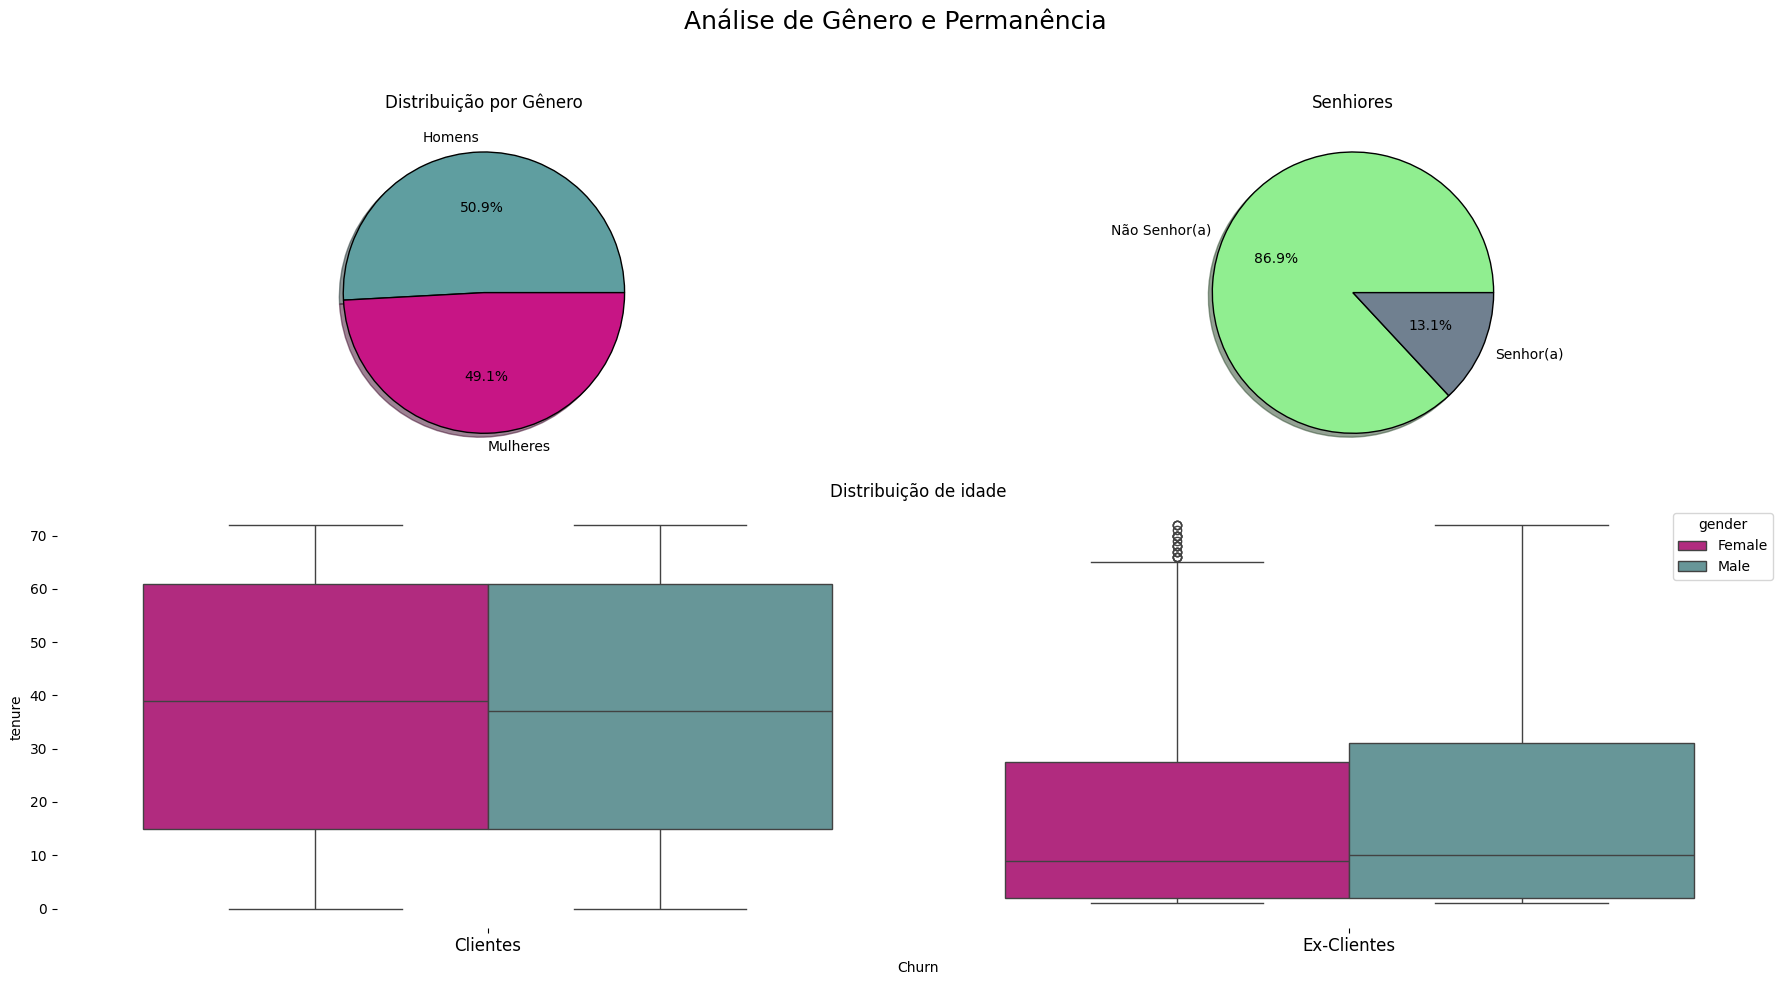

<module 'matplotlib.pyplot' from 'C:\\Users\\Ricar\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

In [92]:
Genero()